In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

C:\Users\katleho.mokhele\AppData\Roaming\Python\Python37\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\katleho.mokhele\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\katleho.mokhele\AppData\Roaming\Python\Python37\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [3]:
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection
import sklearn.preprocessing as preproc
from sklearn.feature_extraction import text
import pickle
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
import lightgbm as lgb


from wordcloud import WordCloud, ImageColorGenerator

from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Import Libraries for Data Visualisation
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from matplotlib.colors import ListedColormap
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob, Word, Blobber

from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [4]:
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
submission = pd.read_csv('sample.csv')

In [5]:
train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [6]:
#Copy the unprocessed train and test dataframes
X = train['text'] 
y = train['lang_id']

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfid_vectorizer = TfidfVectorizer()
X = tfid_vectorizer.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
names = ['Logistic Regression', 'Nearest Neighbors',
         'Linear SVM', 'RBF SVM',
         'Decision Tree', 'Random Forest',  'AdaBoost']

In [9]:

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    AdaBoostClassifier()
]

In [10]:
results = []

models = {}
confusion = {}
class_report = {}


for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    run_time = %timeit -q -o clf.fit(X_train, y_train)

    print ('... predicting')
    y_pred = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    print ('... scoring')
    accuracy  = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred, average='macro')
    recall    = recall_score(y_train, y_pred, average='macro')

    f1        = f1_score(y_train, y_pred, average='macro')
    f1_test   = f1_score(y_test, y_pred_test, average='macro')

    # Save the results to dictionaries
    models[name] = clf
    confusion[name] = confusion_matrix(y_train, y_pred)
    class_report[name] = classification_report(y_train, y_pred)

    results.append([name, accuracy, precision, recall, f1, f1_test, run_time.best])


results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Train', 'F1 Test', 'Train Time'])
results.set_index('Classifier', inplace= True)

Fitting Logistic Regression model...
... predicting
... scoring
Fitting Nearest Neighbors model...
... predicting
... scoring
Fitting Linear SVM model...
... predicting
... scoring
Fitting RBF SVM model...
... predicting
... scoring
Fitting Decision Tree model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting AdaBoost model...
... predicting
... scoring


In [11]:
results.sort_values('F1 Train', ascending=False)

,Accuracy,Precision,Recall,F1 Train,F1 Test,Train Time
Classifier,,,,,,
RBF SVM,1.000000,1.000000,1.000000,1.000000,0.988843,278.176835
Logistic Regression,0.999545,0.999547,0.999548,0.999547,0.994171,25.514316
Nearest Neighbors,0.978295,0.978541,0.978320,0.978222,0.952653,0.030249
Linear SVM,0.944508,0.962693,0.944570,0.946699,0.930872,190.029949
AdaBoost,0.639924,0.680365,0.640848,0.585414,0.584816,171.499115
Decision Tree,0.569242,0.782113,0.568635,0.518956,0.513548,3.781281
Random Forest,0.097008,0.780389,0.096361,0.026077,0.021110,0.105939


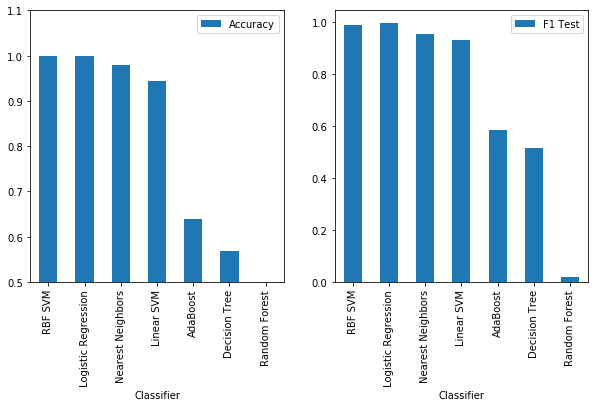

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
results.sort_values('Accuracy', ascending=False, inplace=True)
results.plot(y=['Accuracy'], kind='bar', ax=ax[0], xlim=[0,1.1], ylim=[0.50,1.1])
results.plot(y='F1 Test', kind='bar', ax=ax[1])

In [13]:
model_rbf = models['RBF SVM']


In [29]:
X_test1 = test['text']
v_test1 = tfid_vectorizer.transform(X_test1)
# Making predictions on the datase and adding a sentiment column to our original test_df
test['lang_id'] = model_rbf.predict(v_test1)

#creating an output csv for submission
test[['index','lang_id']].to_csv('rbf.csv', index=False)

In [15]:
model_lg = models['Logistic Regression']

In [30]:
X_test2 = test['text']
v_test2 = tfid_vectorizer.transform(X_test2)
# Making predictions on the datase and adding a sentiment column to our original test_df
test['lang_id'] = model_lg.predict(v_test2)

#creating an output csv for submission
test[['index','lang_id']].to_csv('logistic.csv', index=False)

In [17]:
model_nn = models['Nearest Neighbors']

In [31]:
X_test3 = test['text']
v_test3 = tfid_vectorizer.transform(X_test3)
# Making predictions on the datase and adding a sentiment column to our original test_df
test['lang_id'] = model_nn.predict(v_test3)

#creating an output csv for submission
test[['index','lang_id']].to_csv('nearest.csv', index=False)

In [19]:
model_ls = models['Linear SVM']

In [32]:
X_test4 = test['text']
v_test4 = tfid_vectorizer.transform(X_test4)
# Making predictions on the datase and adding a sentiment column to our original test_df
test['lang_id'] = model_ls.predict(v_test4)

#creating an output csv for submission
test[['index','lang_id']].to_csv('linear.csv', index=False)

In [33]:
rbf = pd.read_csv('rbf.csv')

In [34]:
rbf.head()

,index,lang_id
0,1,zul
1,2,nbl
2,3,ven
3,4,ssw
4,5,zul


In [35]:
!pip install -q tensorflow==2.0.0-alpha0

In [36]:
import tensorflow as td

In [37]:
grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg = LogisticRegression()
logreg_cv = GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'penalty': 'l2'}
accuracy : 0.9972727272727274


In [38]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In [39]:
param_grid = {'C':[1,10],'gamma':[1,0.1], 'kernel':['linear','rbf']}

grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=2)

grid.fit(X_train,y_train)
grid.best_params_
predic = grid.predict(X_test)
print(classification_report(y_test,predic))
print(confusion_matrix(y_test, predic))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ...................... C=1, gamma=1, kernel=linear, total=  59.6s
[CV] C=1, gamma=1, kernel=linear .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   59.5s remaining:    0.0s


[CV] ...................... C=1, gamma=1, kernel=linear, total= 1.1min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total= 1.1min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total= 1.1min
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ...................... C=1, gamma=1, kernel=linear, total= 1.1min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total= 2.1min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total= 2.0min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total= 1.9min
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 58.5min finished


              precision    recall  f1-score   support

         afr       1.00      0.99      1.00       583
         eng       1.00      1.00      1.00       615
         nbl       0.99      0.99      0.99       583
         nso       1.00      0.99      1.00       625
         sot       1.00      1.00      1.00       618
         ssw       1.00      1.00      1.00       584
         tsn       1.00      1.00      1.00       598
         tso       1.00      1.00      1.00       561
         ven       1.00      1.00      1.00       634
         xho       1.00      1.00      1.00       609
         zul       0.97      0.99      0.98       590

    accuracy                           1.00      6600
   macro avg       1.00      1.00      1.00      6600
weighted avg       1.00      1.00      1.00      6600

[[578   0   0   0   0   1   0   0   0   0   4]
 [  0 612   0   0   0   0   0   0   0   0   3]
 [  0   0 577   0   0   0   0   0   0   0   6]
 [  0   0   0 621   1   0   1   0   0   1   1]

In [9]:
logreg2=LogisticRegression(C=100.0,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 0.9960606060606061


In [11]:
X_test5 = test['text']
v_test5 = tfid_vectorizer.transform(X_test5)
# Making predictions on the datase and adding a sentiment column to our original test_df
test['lang_id'] = logreg2.predict(v_test5)

#creating an output csv for submission
test[['index','lang_id']].to_csv('logreg.csv', index=False)

In [12]:
rfc1=RandomForestClassifier(random_state=42, max_features='auto', n_estimators= 500, max_depth=8, criterion='entropy')
rfc1.fit(X_train, y_train)
pred=rfc1.predict(X_test)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.9633333333333334


In [13]:
X_test6 = test['text']
v_test6 = tfid_vectorizer.transform(X_test6)
# Making predictions on the datase and adding a sentiment column to our original test_df
test['lang_id'] = rfc1.predict(v_test6)

#creating an output csv for submission
test[['index','lang_id']].to_csv('random.csv', index=False)

In [17]:
lsvc1=SVC(C = 1, gamma = 1, kernel = 'linear')
lsvc1.fit(X_train, y_train)
pred=lsvc1.predict(X_test)
print("Accuracy for LinearSvC on CV data: ",accuracy_score(y_test,pred))

Accuracy for LinearSvC on CV data:  0.9956060606060606


In [18]:
X_test7 = test['text']
v_test7 = tfid_vectorizer.transform(X_test7)
# Making predictions on the datase and adding a sentiment column to our original test_df
test['lang_id'] = lsvc1.predict(v_test7)

#creating an output csv for submission
test[['index','lang_id']].to_csv('lsvc.csv', index=False)

In [19]:
!pip install keras

In [22]:
!pip install --upgrade tensorflow

  Using cached tensorflow-2.3.1-cp37-cp37m-win_amd64.whl (342.5 MB)
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.2.0
    Uninstalling tensorflow-2.2.0:
      Successfully uninstalled tensorflow-2.2.0
  Rolling back uninstall of tensorflow
  Moving to c:\users\katleho.mokhele\appdata\roaming\python\python37\site-packages\tensorflow-2.2.0.dist-info\
   from c:\users\katleho.mokhele\appdata\roaming\python\python37\site-packages\~ensorflow-2.2.0.dist-info
  Moving to c:\users\katleho.mokhele\appdata\roaming\python\python37\site-packages\tensorflow\core\protobuf\
   from c:\users\katleho.mokhele\appdata\roaming\python\python37\site-packages\tensorflow\core\~rotobuf
  Moving to c:\users\katleho.mokhele\appdata\roaming\python\python37\site-packages\tensorflow\include\external\boringssl\src\crypto\fipsmodule\modes\
   from c:\users\katleho.mokhele\appdata\roaming\python\python37\site-packages\tensorflow\include\external\boringssl\src\crypto\fipsmodule\~odes


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'C:\\Users\\katleho.mokhele\\Anaconda3\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



In [24]:
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

LGBMClassifier()

In [25]:
y_pred=clf.predict(X_test)

In [26]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred, y_test)
print('LightGBM Model accuracy score: {0:0.4f}'.format(accuracy_score(y_test, y_pred)))

LightGBM Model accuracy score: 0.9824


In [27]:
X_test8 = test['text']
v_test8 = tfid_vectorizer.transform(X_test8)
# Making predictions on the datase and adding a sentiment column to our original test_df
test['lang_id'] = lsvc1.predict(v_test8)

#creating an output csv for submission
test[['index','lang_id']].to_csv('light.csv', index=False)